In [2]:
import os
import time
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from statsmodels.formula.api import ols
%matplotlib inline
import tushare as ts
from turtle import color
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, f_regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVR,SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

from scipy.spatial.distance import pdist, squareform

In [ ]:
def entropy(probs):
    
    return -probs.dot(np.log2(probs))


def mutual_info(df):
    
    Hx = entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = df.groupby(list(df.columns.values)).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    return {'H_'+list(df)[0]:Hx,'H_'+list(df)[1]:Hy,'MI':MI,'NMI':NMI} 

In [ ]:
# read rental data
path = os.getcwd().replace("notebooks","") + "data/curated/"
df = pd.read_csv(path+'rental_median.csv', low_memory = True)
df = df.drop_duplicates()
df = df[['Suburb','Rental_total_Mar_2000_1b_flat', 'Rental_total_Jun_2000_1b_flat', 'Rental_total_Sep_2000_1b_flat', 'Rental_total_Dec_2000_1b_flat', 'Rental_total_Mar_2001_1b_flat', 'Rental_total_Jun_2001_1b_flat', 'Rental_total_Sep_2001_1b_flat', 'Rental_total_Dec_2001_1b_flat', 'Rental_total_Mar_2002_1b_flat', 'Rental_total_Jun_2002_1b_flat', 'Rental_total_Sep_2002_1b_flat', 'Rental_total_Dec_2002_1b_flat', 'Rental_total_Mar_2003_1b_flat', 'Rental_total_Jun_2003_1b_flat', 'Rental_total_Sep_2003_1b_flat', 'Rental_total_Dec_2003_1b_flat', 'Rental_total_Mar_2004_1b_flat', 'Rental_total_Jun_2004_1b_flat', 'Rental_total_Sep_2004_1b_flat', 'Rental_total_Dec_2004_1b_flat', 'Rental_total_Mar_2005_1b_flat', 'Rental_total_Jun_2005_1b_flat', 'Rental_total_Sep_2005_1b_flat', 'Rental_total_Dec_2005_1b_flat', 'Rental_total_Mar_2006_1b_flat', 'Rental_total_Jun_2006_1b_flat', 'Rental_total_Sep_2006_1b_flat', 'Rental_total_Dec_2006_1b_flat', 'Rental_total_Mar_2007_1b_flat', 'Rental_total_Jun_2007_1b_flat', 'Rental_total_Sep_2007_1b_flat', 'Rental_total_Dec_2007_1b_flat', 'Rental_total_Mar_2008_1b_flat', 'Rental_total_Jun_2008_1b_flat', 'Rental_total_Sep_2008_1b_flat', 'Rental_total_Dec_2008_1b_flat', 'Rental_total_Mar_2009_1b_flat', 'Rental_total_Jun_2009_1b_flat', 'Rental_total_Sep_2009_1b_flat', 'Rental_total_Dec_2009_1b_flat', 'Rental_total_Mar_2010_1b_flat', 'Rental_total_Jun_2010_1b_flat', 'Rental_total_Sep_2010_1b_flat', 'Rental_total_Dec_2010_1b_flat', 'Rental_total_Mar_2011_1b_flat', 'Rental_total_Jun_2011_1b_flat', 'Rental_total_Sep_2011_1b_flat', 'Rental_total_Dec_2011_1b_flat', 'Rental_total_Mar_2012_1b_flat', 'Rental_total_Jun_2012_1b_flat', 'Rental_total_Sep_2012_1b_flat', 'Rental_total_Dec_2012_1b_flat', 'Rental_total_Mar_2013_1b_flat', 'Rental_total_Jun_2013_1b_flat', 'Rental_total_Sep_2013_1b_flat', 'Rental_total_Dec_2013_1b_flat', 'Rental_total_Mar_2014_1b_flat', 'Rental_total_Jun_2014_1b_flat', 'Rental_total_Sep_2014_1b_flat', 'Rental_total_Dec_2014_1b_flat', 'Rental_total_Mar_2015_1b_flat', 'Rental_total_Jun_2015_1b_flat', 'Rental_total_Sep_2015_1b_flat', 'Rental_total_Dec_2015_1b_flat', 'Rental_total_Mar_2016_1b_flat', 'Rental_total_Jun_2016_1b_flat', 'Rental_total_Sep_2016_1b_flat', 'Rental_total_Dec_2016_1b_flat', 'Rental_total_Mar_2017_1b_flat', 'Rental_total_Jun_2017_1b_flat', 'Rental_total_Sep_2017_1b_flat', 'Rental_total_Dec_2017_1b_flat', 'Rental_total_Mar_2018_1b_flat', 'Rental_total_Jun_2018_1b_flat', 'Rental_total_Sep_2018_1b_flat', 'Rental_total_Dec_2018_1b_flat', 'Rental_total_Mar_2019_1b_flat', 'Rental_total_Jun_2019_1b_flat', 'Rental_total_Sep_2019_1b_flat', 'Rental_total_Dec_2019_1b_flat', 'Rental_total_Mar_2020_1b_flat', 'Rental_total_Jun_2020_1b_flat', 'Rental_total_Sep_2020_1b_flat', 'Rental_total_Dec_2020_1b_flat', 'Rental_total_Mar_2021_1b_flat', 'Rental_total_Jun_2021_1b_flat', 'Rental_total_Mar_2000_2b_flat', 'Rental_total_Jun_2000_2b_flat', 'Rental_total_Sep_2000_2b_flat', 'Rental_total_Dec_2000_2b_flat', 'Rental_total_Mar_2001_2b_flat', 'Rental_total_Jun_2001_2b_flat', 'Rental_total_Sep_2001_2b_flat', 'Rental_total_Dec_2001_2b_flat', 'Rental_total_Mar_2002_2b_flat', 'Rental_total_Jun_2002_2b_flat', 'Rental_total_Sep_2002_2b_flat', 'Rental_total_Dec_2002_2b_flat', 'Rental_total_Mar_2003_2b_flat', 'Rental_total_Jun_2003_2b_flat', 'Rental_total_Sep_2003_2b_flat', 'Rental_total_Dec_2003_2b_flat', 'Rental_total_Mar_2004_2b_flat', 'Rental_total_Jun_2004_2b_flat', 'Rental_total_Sep_2004_2b_flat', 'Rental_total_Dec_2004_2b_flat', 'Rental_total_Mar_2005_2b_flat', 'Rental_total_Jun_2005_2b_flat', 'Rental_total_Sep_2005_2b_flat', 'Rental_total_Dec_2005_2b_flat', 'Rental_total_Mar_2006_2b_flat', 'Rental_total_Jun_2006_2b_flat', 'Rental_total_Sep_2006_2b_flat', 'Rental_total_Dec_2006_2b_flat', 'Rental_total_Mar_2007_2b_flat', 'Rental_total_Jun_2007_2b_flat', 'Rental_total_Sep_2007_2b_flat', 'Rental_total_Dec_2007_2b_flat', 'Rental_total_Mar_2008_2b_flat', 'Rental_total_Jun_2008_2b_flat', 'Rental_total_Sep_2008_2b_flat', 'Rental_total_Dec_2008_2b_flat', 'Rental_total_Mar_2009_2b_flat', 'Rental_total_Jun_2009_2b_flat', 'Rental_total_Sep_2009_2b_flat', 'Rental_total_Dec_2009_2b_flat', 'Rental_total_Mar_2010_2b_flat', 'Rental_total_Jun_2010_2b_flat', 'Rental_total_Sep_2010_2b_flat', 'Rental_total_Dec_2010_2b_flat', 'Rental_total_Mar_2011_2b_flat', 'Rental_total_Jun_2011_2b_flat', 'Rental_total_Sep_2011_2b_flat', 'Rental_total_Dec_2011_2b_flat', 'Rental_total_Mar_2012_2b_flat', 'Rental_total_Jun_2012_2b_flat', 'Rental_total_Sep_2012_2b_flat', 'Rental_total_Dec_2012_2b_flat', 'Rental_total_Mar_2013_2b_flat', 'Rental_total_Jun_2013_2b_flat', 'Rental_total_Sep_2013_2b_flat', 'Rental_total_Dec_2013_2b_flat', 'Rental_total_Mar_2014_2b_flat', 'Rental_total_Jun_2014_2b_flat', 'Rental_total_Sep_2014_2b_flat', 'Rental_total_Dec_2014_2b_flat', 'Rental_total_Mar_2015_2b_flat', 'Rental_total_Jun_2015_2b_flat', 'Rental_total_Sep_2015_2b_flat', 'Rental_total_Dec_2015_2b_flat', 'Rental_total_Mar_2016_2b_flat', 'Rental_total_Jun_2016_2b_flat', 'Rental_total_Sep_2016_2b_flat', 'Rental_total_Dec_2016_2b_flat', 'Rental_total_Mar_2017_2b_flat', 'Rental_total_Jun_2017_2b_flat', 'Rental_total_Sep_2017_2b_flat', 'Rental_total_Dec_2017_2b_flat', 'Rental_total_Mar_2018_2b_flat', 'Rental_total_Jun_2018_2b_flat', 'Rental_total_Sep_2018_2b_flat', 'Rental_total_Dec_2018_2b_flat', 'Rental_total_Mar_2019_2b_flat', 'Rental_total_Jun_2019_2b_flat', 'Rental_total_Sep_2019_2b_flat', 'Rental_total_Dec_2019_2b_flat', 'Rental_total_Mar_2020_2b_flat', 'Rental_total_Jun_2020_2b_flat', 'Rental_total_Sep_2020_2b_flat', 'Rental_total_Dec_2020_2b_flat', 'Rental_total_Mar_2021_2b_flat', 'Rental_total_Jun_2021_2b_flat', 'Rental_total_Mar_2000_3b_flat', 'Rental_total_Jun_2000_3b_flat', 'Rental_total_Sep_2000_3b_flat', 'Rental_total_Dec_2000_3b_flat', 'Rental_total_Mar_2001_3b_flat', 'Rental_total_Jun_2001_3b_flat', 'Rental_total_Sep_2001_3b_flat', 'Rental_total_Dec_2001_3b_flat', 'Rental_total_Mar_2002_3b_flat', 'Rental_total_Jun_2002_3b_flat', 'Rental_total_Sep_2002_3b_flat', 'Rental_total_Dec_2002_3b_flat', 'Rental_total_Mar_2003_3b_flat', 'Rental_total_Jun_2003_3b_flat', 'Rental_total_Sep_2003_3b_flat', 'Rental_total_Dec_2003_3b_flat', 'Rental_total_Mar_2004_3b_flat', 'Rental_total_Jun_2004_3b_flat', 'Rental_total_Sep_2004_3b_flat', 'Rental_total_Dec_2004_3b_flat', 'Rental_total_Mar_2005_3b_flat', 'Rental_total_Jun_2005_3b_flat', 'Rental_total_Sep_2005_3b_flat', 'Rental_total_Dec_2005_3b_flat', 'Rental_total_Mar_2006_3b_flat', 'Rental_total_Jun_2006_3b_flat', 'Rental_total_Sep_2006_3b_flat', 'Rental_total_Dec_2006_3b_flat', 'Rental_total_Mar_2007_3b_flat', 'Rental_total_Jun_2007_3b_flat', 'Rental_total_Sep_2007_3b_flat', 'Rental_total_Dec_2007_3b_flat', 'Rental_total_Mar_2008_3b_flat', 'Rental_total_Jun_2008_3b_flat', 'Rental_total_Sep_2008_3b_flat', 'Rental_total_Dec_2008_3b_flat', 'Rental_total_Mar_2009_3b_flat', 'Rental_total_Jun_2009_3b_flat', 'Rental_total_Sep_2009_3b_flat', 'Rental_total_Dec_2009_3b_flat', 'Rental_total_Mar_2010_3b_flat', 'Rental_total_Jun_2010_3b_flat', 'Rental_total_Sep_2010_3b_flat', 'Rental_total_Dec_2010_3b_flat', 'Rental_total_Mar_2011_3b_flat', 'Rental_total_Jun_2011_3b_flat', 'Rental_total_Sep_2011_3b_flat', 'Rental_total_Dec_2011_3b_flat', 'Rental_total_Mar_2012_3b_flat', 'Rental_total_Jun_2012_3b_flat', 'Rental_total_Sep_2012_3b_flat', 'Rental_total_Dec_2012_3b_flat', 'Rental_total_Mar_2013_3b_flat', 'Rental_total_Jun_2013_3b_flat', 'Rental_total_Sep_2013_3b_flat', 'Rental_total_Dec_2013_3b_flat', 'Rental_total_Mar_2014_3b_flat', 'Rental_total_Jun_2014_3b_flat', 'Rental_total_Sep_2014_3b_flat', 'Rental_total_Dec_2014_3b_flat', 'Rental_total_Mar_2015_3b_flat', 'Rental_total_Jun_2015_3b_flat', 'Rental_total_Sep_2015_3b_flat', 'Rental_total_Dec_2015_3b_flat', 'Rental_total_Mar_2016_3b_flat', 'Rental_total_Jun_2016_3b_flat', 'Rental_total_Sep_2016_3b_flat', 'Rental_total_Dec_2016_3b_flat', 'Rental_total_Mar_2017_3b_flat', 'Rental_total_Jun_2017_3b_flat', 'Rental_total_Sep_2017_3b_flat', 'Rental_total_Dec_2017_3b_flat', 'Rental_total_Mar_2018_3b_flat', 'Rental_total_Jun_2018_3b_flat', 'Rental_total_Sep_2018_3b_flat', 'Rental_total_Dec_2018_3b_flat', 'Rental_total_Mar_2019_3b_flat', 'Rental_total_Jun_2019_3b_flat', 'Rental_total_Sep_2019_3b_flat', 'Rental_total_Dec_2019_3b_flat', 'Rental_total_Mar_2020_3b_flat', 'Rental_total_Jun_2020_3b_flat', 'Rental_total_Sep_2020_3b_flat', 'Rental_total_Dec_2020_3b_flat', 'Rental_total_Mar_2021_3b_flat', 'Rental_total_Jun_2021_3b_flat', 'Rental_total_Mar_2000_2b_house', 'Rental_total_Jun_2000_2b_house', 'Rental_total_Sep_2000_2b_house', 'Rental_total_Dec_2000_2b_house', 'Rental_total_Mar_2001_2b_house', 'Rental_total_Jun_2001_2b_house', 'Rental_total_Sep_2001_2b_house', 'Rental_total_Dec_2001_2b_house', 'Rental_total_Mar_2002_2b_house', 'Rental_total_Jun_2002_2b_house', 'Rental_total_Sep_2002_2b_house', 'Rental_total_Dec_2002_2b_house', 'Rental_total_Mar_2003_2b_house', 'Rental_total_Jun_2003_2b_house', 'Rental_total_Sep_2003_2b_house', 'Rental_total_Dec_2003_2b_house', 'Rental_total_Mar_2004_2b_house', 'Rental_total_Jun_2004_2b_house', 'Rental_total_Sep_2004_2b_house', 'Rental_total_Dec_2004_2b_house', 'Rental_total_Mar_2005_2b_house', 'Rental_total_Jun_2005_2b_house', 'Rental_total_Sep_2005_2b_house', 'Rental_total_Dec_2005_2b_house', 'Rental_total_Mar_2006_2b_house', 'Rental_total_Jun_2006_2b_house', 'Rental_total_Sep_2006_2b_house', 'Rental_total_Dec_2006_2b_house', 'Rental_total_Mar_2007_2b_house', 'Rental_total_Jun_2007_2b_house', 'Rental_total_Sep_2007_2b_house', 'Rental_total_Dec_2007_2b_house', 'Rental_total_Mar_2008_2b_house', 'Rental_total_Jun_2008_2b_house', 'Rental_total_Sep_2008_2b_house', 'Rental_total_Dec_2008_2b_house', 'Rental_total_Mar_2009_2b_house', 'Rental_total_Jun_2009_2b_house', 'Rental_total_Sep_2009_2b_house', 'Rental_total_Dec_2009_2b_house', 'Rental_total_Mar_2010_2b_house', 'Rental_total_Jun_2010_2b_house', 'Rental_total_Sep_2010_2b_house', 'Rental_total_Dec_2010_2b_house', 'Rental_total_Mar_2011_2b_house', 'Rental_total_Jun_2011_2b_house', 'Rental_total_Sep_2011_2b_house', 'Rental_total_Dec_2011_2b_house', 'Rental_total_Mar_2012_2b_house', 'Rental_total_Jun_2012_2b_house', 'Rental_total_Sep_2012_2b_house', 'Rental_total_Dec_2012_2b_house', 'Rental_total_Mar_2013_2b_house', 'Rental_total_Jun_2013_2b_house', 'Rental_total_Sep_2013_2b_house', 'Rental_total_Dec_2013_2b_house', 'Rental_total_Mar_2014_2b_house', 'Rental_total_Jun_2014_2b_house', 'Rental_total_Sep_2014_2b_house', 'Rental_total_Dec_2014_2b_house', 'Rental_total_Mar_2015_2b_house', 'Rental_total_Jun_2015_2b_house', 'Rental_total_Sep_2015_2b_house', 'Rental_total_Dec_2015_2b_house', 'Rental_total_Mar_2016_2b_house', 'Rental_total_Jun_2016_2b_house', 'Rental_total_Sep_2016_2b_house', 'Rental_total_Dec_2016_2b_house', 'Rental_total_Mar_2017_2b_house', 'Rental_total_Jun_2017_2b_house', 'Rental_total_Sep_2017_2b_house', 'Rental_total_Dec_2017_2b_house', 'Rental_total_Mar_2018_2b_house', 'Rental_total_Jun_2018_2b_house', 'Rental_total_Sep_2018_2b_house', 'Rental_total_Dec_2018_2b_house', 'Rental_total_Mar_2019_2b_house', 'Rental_total_Jun_2019_2b_house', 'Rental_total_Sep_2019_2b_house', 'Rental_total_Dec_2019_2b_house', 'Rental_total_Mar_2020_2b_house', 'Rental_total_Jun_2020_2b_house', 'Rental_total_Sep_2020_2b_house', 'Rental_total_Dec_2020_2b_house', 'Rental_total_Mar_2021_2b_house', 'Rental_total_Jun_2021_2b_house', 'Rental_total_Mar_2000_3b_house', 'Rental_total_Jun_2000_3b_house', 'Rental_total_Sep_2000_3b_house', 'Rental_total_Dec_2000_3b_house', 'Rental_total_Mar_2001_3b_house', 'Rental_total_Jun_2001_3b_house', 'Rental_total_Sep_2001_3b_house', 'Rental_total_Dec_2001_3b_house', 'Rental_total_Mar_2002_3b_house', 'Rental_total_Jun_2002_3b_house', 'Rental_total_Sep_2002_3b_house', 'Rental_total_Dec_2002_3b_house', 'Rental_total_Mar_2003_3b_house', 'Rental_total_Jun_2003_3b_house', 'Rental_total_Sep_2003_3b_house', 'Rental_total_Dec_2003_3b_house', 'Rental_total_Mar_2004_3b_house', 'Rental_total_Jun_2004_3b_house', 'Rental_total_Sep_2004_3b_house', 'Rental_total_Dec_2004_3b_house', 'Rental_total_Mar_2005_3b_house', 'Rental_total_Jun_2005_3b_house', 'Rental_total_Sep_2005_3b_house', 'Rental_total_Dec_2005_3b_house', 'Rental_total_Mar_2006_3b_house', 'Rental_total_Jun_2006_3b_house', 'Rental_total_Sep_2006_3b_house', 'Rental_total_Dec_2006_3b_house', 'Rental_total_Mar_2007_3b_house', 'Rental_total_Jun_2007_3b_house', 'Rental_total_Sep_2007_3b_house', 'Rental_total_Dec_2007_3b_house', 'Rental_total_Mar_2008_3b_house', 'Rental_total_Jun_2008_3b_house', 'Rental_total_Sep_2008_3b_house', 'Rental_total_Dec_2008_3b_house', 'Rental_total_Mar_2009_3b_house', 'Rental_total_Jun_2009_3b_house', 'Rental_total_Sep_2009_3b_house', 'Rental_total_Dec_2009_3b_house', 'Rental_total_Mar_2010_3b_house', 'Rental_total_Jun_2010_3b_house', 'Rental_total_Sep_2010_3b_house', 'Rental_total_Dec_2010_3b_house', 'Rental_total_Mar_2011_3b_house', 'Rental_total_Jun_2011_3b_house', 'Rental_total_Sep_2011_3b_house', 'Rental_total_Dec_2011_3b_house', 'Rental_total_Mar_2012_3b_house', 'Rental_total_Jun_2012_3b_house', 'Rental_total_Sep_2012_3b_house', 'Rental_total_Dec_2012_3b_house', 'Rental_total_Mar_2013_3b_house', 'Rental_total_Jun_2013_3b_house', 'Rental_total_Sep_2013_3b_house', 'Rental_total_Dec_2013_3b_house', 'Rental_total_Mar_2014_3b_house', 'Rental_total_Jun_2014_3b_house', 'Rental_total_Sep_2014_3b_house', 'Rental_total_Dec_2014_3b_house', 'Rental_total_Mar_2015_3b_house', 'Rental_total_Jun_2015_3b_house', 'Rental_total_Sep_2015_3b_house', 'Rental_total_Dec_2015_3b_house', 'Rental_total_Mar_2016_3b_house', 'Rental_total_Jun_2016_3b_house', 'Rental_total_Sep_2016_3b_house', 'Rental_total_Dec_2016_3b_house', 'Rental_total_Mar_2017_3b_house', 'Rental_total_Jun_2017_3b_house', 'Rental_total_Sep_2017_3b_house', 'Rental_total_Dec_2017_3b_house', 'Rental_total_Mar_2018_3b_house', 'Rental_total_Jun_2018_3b_house', 'Rental_total_Sep_2018_3b_house', 'Rental_total_Dec_2018_3b_house', 'Rental_total_Mar_2019_3b_house', 'Rental_total_Jun_2019_3b_house', 'Rental_total_Sep_2019_3b_house', 'Rental_total_Dec_2019_3b_house', 'Rental_total_Mar_2020_3b_house', 'Rental_total_Jun_2020_3b_house', 'Rental_total_Sep_2020_3b_house', 'Rental_total_Dec_2020_3b_house', 'Rental_total_Mar_2021_3b_house', 'Rental_total_Jun_2021_3b_house', 'Rental_total_Mar_2000_4b_house', 'Rental_total_Jun_2000_4b_house', 'Rental_total_Sep_2000_4b_house', 'Rental_total_Dec_2000_4b_house', 'Rental_total_Mar_2001_4b_house', 'Rental_total_Jun_2001_4b_house', 'Rental_total_Sep_2001_4b_house', 'Rental_total_Dec_2001_4b_house', 'Rental_total_Mar_2002_4b_house', 'Rental_total_Jun_2002_4b_house', 'Rental_total_Sep_2002_4b_house', 'Rental_total_Dec_2002_4b_house', 'Rental_total_Mar_2003_4b_house', 'Rental_total_Jun_2003_4b_house', 'Rental_total_Sep_2003_4b_house', 'Rental_total_Dec_2003_4b_house', 'Rental_total_Mar_2004_4b_house', 'Rental_total_Jun_2004_4b_house', 'Rental_total_Sep_2004_4b_house', 'Rental_total_Dec_2004_4b_house', 'Rental_total_Mar_2005_4b_house', 'Rental_total_Jun_2005_4b_house', 'Rental_total_Sep_2005_4b_house', 'Rental_total_Dec_2005_4b_house', 'Rental_total_Mar_2006_4b_house', 'Rental_total_Jun_2006_4b_house', 'Rental_total_Sep_2006_4b_house', 'Rental_total_Dec_2006_4b_house', 'Rental_total_Mar_2007_4b_house', 'Rental_total_Jun_2007_4b_house', 'Rental_total_Sep_2007_4b_house', 'Rental_total_Dec_2007_4b_house', 'Rental_total_Mar_2008_4b_house', 'Rental_total_Jun_2008_4b_house', 'Rental_total_Sep_2008_4b_house', 'Rental_total_Dec_2008_4b_house', 'Rental_total_Mar_2009_4b_house', 'Rental_total_Jun_2009_4b_house', 'Rental_total_Sep_2009_4b_house', 'Rental_total_Dec_2009_4b_house', 'Rental_total_Mar_2010_4b_house', 'Rental_total_Jun_2010_4b_house', 'Rental_total_Sep_2010_4b_house', 'Rental_total_Dec_2010_4b_house', 'Rental_total_Mar_2011_4b_house', 'Rental_total_Jun_2011_4b_house', 'Rental_total_Sep_2011_4b_house', 'Rental_total_Dec_2011_4b_house', 'Rental_total_Mar_2012_4b_house', 'Rental_total_Jun_2012_4b_house', 'Rental_total_Sep_2012_4b_house', 'Rental_total_Dec_2012_4b_house', 'Rental_total_Mar_2013_4b_house', 'Rental_total_Jun_2013_4b_house', 'Rental_total_Sep_2013_4b_house', 'Rental_total_Dec_2013_4b_house', 'Rental_total_Mar_2014_4b_house', 'Rental_total_Jun_2014_4b_house', 'Rental_total_Sep_2014_4b_house', 'Rental_total_Dec_2014_4b_house', 'Rental_total_Mar_2015_4b_house', 'Rental_total_Jun_2015_4b_house', 'Rental_total_Sep_2015_4b_house', 'Rental_total_Dec_2015_4b_house', 'Rental_total_Mar_2016_4b_house', 'Rental_total_Jun_2016_4b_house', 'Rental_total_Sep_2016_4b_house', 'Rental_total_Dec_2016_4b_house', 'Rental_total_Mar_2017_4b_house', 'Rental_total_Jun_2017_4b_house', 'Rental_total_Sep_2017_4b_house', 'Rental_total_Dec_2017_4b_house', 'Rental_total_Mar_2018_4b_house', 'Rental_total_Jun_2018_4b_house', 'Rental_total_Sep_2018_4b_house', 'Rental_total_Dec_2018_4b_house', 'Rental_total_Mar_2019_4b_house', 'Rental_total_Jun_2019_4b_house', 'Rental_total_Sep_2019_4b_house', 'Rental_total_Dec_2019_4b_house', 'Rental_total_Mar_2020_4b_house', 'Rental_total_Jun_2020_4b_house', 'Rental_total_Sep_2020_4b_house', 'Rental_total_Dec_2020_4b_house', 'Rental_total_Mar_2021_4b_house', 'Rental_total_Jun_2021_4b_house', 'Rental_total_Mar_2000', 'Rental_total_Jun_2000', 'Rental_total_Sep_2000', 'Rental_total_Dec_2000', 'Rental_total_Mar_2001', 'Rental_total_Jun_2001', 'Rental_total_Sep_2001', 'Rental_total_Dec_2001', 'Rental_total_Mar_2002', 'Rental_total_Jun_2002', 'Rental_total_Sep_2002', 'Rental_total_Dec_2002', 'Rental_total_Mar_2003', 'Rental_total_Jun_2003', 'Rental_total_Sep_2003', 'Rental_total_Dec_2003', 'Rental_total_Mar_2004', 'Rental_total_Jun_2004', 'Rental_total_Sep_2004', 'Rental_total_Dec_2004', 'Rental_total_Mar_2005', 'Rental_total_Jun_2005', 'Rental_total_Sep_2005', 'Rental_total_Dec_2005', 'Rental_total_Mar_2006', 'Rental_total_Jun_2006', 'Rental_total_Sep_2006', 'Rental_total_Dec_2006', 'Rental_total_Mar_2007', 'Rental_total_Jun_2007', 'Rental_total_Sep_2007', 'Rental_total_Dec_2007', 'Rental_total_Mar_2008', 'Rental_total_Jun_2008', 'Rental_total_Sep_2008', 'Rental_total_Dec_2008', 'Rental_total_Mar_2009', 'Rental_total_Jun_2009', 'Rental_total_Sep_2009', 'Rental_total_Dec_2009', 'Rental_total_Mar_2010', 'Rental_total_Jun_2010', 'Rental_total_Sep_2010', 'Rental_total_Dec_2010', 'Rental_total_Mar_2011', 'Rental_total_Jun_2011', 'Rental_total_Sep_2011', 'Rental_total_Dec_2011', 'Rental_total_Mar_2012', 'Rental_total_Jun_2012', 'Rental_total_Sep_2012', 'Rental_total_Dec_2012', 'Rental_total_Mar_2013', 'Rental_total_Jun_2013', 'Rental_total_Sep_2013', 'Rental_total_Dec_2013', 'Rental_total_Mar_2014', 'Rental_total_Jun_2014', 'Rental_total_Sep_2014', 'Rental_total_Dec_2014', 'Rental_total_Mar_2015', 'Rental_total_Jun_2015', 'Rental_total_Sep_2015', 'Rental_total_Dec_2015', 'Rental_total_Mar_2016', 'Rental_total_Jun_2016', 'Rental_total_Sep_2016', 'Rental_total_Dec_2016', 'Rental_total_Mar_2017', 'Rental_total_Jun_2017', 'Rental_total_Sep_2017', 'Rental_total_Dec_2017', 'Rental_total_Mar_2018', 'Rental_total_Jun_2018', 'Rental_total_Sep_2018', 'Rental_total_Dec_2018', 'Rental_total_Mar_2019', 'Rental_total_Jun_2019', 'Rental_total_Sep_2019', 'Rental_total_Dec_2019', 'Rental_total_Mar_2020', 'Rental_total_Jun_2020', 'Rental_total_Sep_2020', 'Rental_total_Dec_2020', 'Rental_total_Mar_2021', 'Rental_total_Jun_2021']]
df = df[['Suburb', 'Rental_total_Mar_2000', 'Rental_total_Jun_2000', 'Rental_total_Sep_2000', 'Rental_total_Dec_2000', 'Rental_total_Mar_2001', 'Rental_total_Jun_2001', 'Rental_total_Sep_2001', 'Rental_total_Dec_2001', 'Rental_total_Mar_2002', 'Rental_total_Jun_2002', 'Rental_total_Sep_2002', 'Rental_total_Dec_2002', 'Rental_total_Mar_2003', 'Rental_total_Jun_2003', 'Rental_total_Sep_2003', 'Rental_total_Dec_2003', 'Rental_total_Mar_2004', 'Rental_total_Jun_2004', 'Rental_total_Sep_2004', 'Rental_total_Dec_2004', 'Rental_total_Mar_2005', 'Rental_total_Jun_2005', 'Rental_total_Sep_2005', 'Rental_total_Dec_2005', 'Rental_total_Mar_2006', 'Rental_total_Jun_2006', 'Rental_total_Sep_2006', 'Rental_total_Dec_2006', 'Rental_total_Mar_2007', 'Rental_total_Jun_2007', 'Rental_total_Sep_2007', 'Rental_total_Dec_2007', 'Rental_total_Mar_2008', 'Rental_total_Jun_2008', 'Rental_total_Sep_2008', 'Rental_total_Dec_2008', 'Rental_total_Mar_2009', 'Rental_total_Jun_2009', 'Rental_total_Sep_2009', 'Rental_total_Dec_2009', 'Rental_total_Mar_2010', 'Rental_total_Jun_2010', 'Rental_total_Sep_2010', 'Rental_total_Dec_2010', 'Rental_total_Mar_2011', 'Rental_total_Jun_2011', 'Rental_total_Sep_2011', 'Rental_total_Dec_2011', 'Rental_total_Mar_2012', 'Rental_total_Jun_2012', 'Rental_total_Sep_2012', 'Rental_total_Dec_2012', 'Rental_total_Mar_2013', 'Rental_total_Jun_2013', 'Rental_total_Sep_2013', 'Rental_total_Dec_2013', 'Rental_total_Mar_2014', 'Rental_total_Jun_2014', 'Rental_total_Sep_2014', 'Rental_total_Dec_2014', 'Rental_total_Mar_2015', 'Rental_total_Jun_2015', 'Rental_total_Sep_2015', 'Rental_total_Dec_2015', 'Rental_total_Mar_2016', 'Rental_total_Jun_2016', 'Rental_total_Sep_2016', 'Rental_total_Dec_2016', 'Rental_total_Mar_2017', 'Rental_total_Jun_2017', 'Rental_total_Sep_2017', 'Rental_total_Dec_2017', 'Rental_total_Mar_2018', 'Rental_total_Jun_2018', 'Rental_total_Sep_2018', 'Rental_total_Dec_2018', 'Rental_total_Mar_2019', 'Rental_total_Jun_2019', 'Rental_total_Sep_2019', 'Rental_total_Dec_2019', 'Rental_total_Mar_2020', 'Rental_total_Jun_2020', 'Rental_total_Sep_2020', 'Rental_total_Dec_2020', 'Rental_total_Mar_2021', 'Rental_total_Jun_2021']]
df

In [ ]:
for suburb in [x for x in df.columns][1:]:
    df[suburb] = df[suburb].replace("-",np.nan)
    df[suburb] = df[suburb].astype(float)
df = df.fillna(0)
df

#### Predict rent for future 3 years

In [ ]:
from sklearn.linear_model import Ridge

train_x = df[['Rental_total_Mar_2000', 'Rental_total_Jun_2000', 'Rental_total_Sep_2000', 'Rental_total_Dec_2000', 'Rental_total_Mar_2001', 'Rental_total_Jun_2001', 'Rental_total_Sep_2001', 'Rental_total_Dec_2001', 'Rental_total_Mar_2002', 'Rental_total_Jun_2002', 'Rental_total_Sep_2002', 'Rental_total_Dec_2002', 'Rental_total_Mar_2003', 'Rental_total_Jun_2003', 'Rental_total_Sep_2003', 'Rental_total_Dec_2003', 'Rental_total_Mar_2004', 'Rental_total_Jun_2004', 'Rental_total_Sep_2004', 'Rental_total_Dec_2004', 'Rental_total_Mar_2005', 'Rental_total_Jun_2005', 'Rental_total_Sep_2005', 'Rental_total_Dec_2005', 'Rental_total_Mar_2006', 'Rental_total_Jun_2006', 'Rental_total_Sep_2006', 'Rental_total_Dec_2006', 'Rental_total_Mar_2007', 'Rental_total_Jun_2007', 'Rental_total_Sep_2007', 'Rental_total_Dec_2007', 'Rental_total_Mar_2008', 'Rental_total_Jun_2008', 'Rental_total_Sep_2008', 'Rental_total_Dec_2008', 'Rental_total_Mar_2009', 'Rental_total_Jun_2009', 'Rental_total_Sep_2009', 'Rental_total_Dec_2009', 'Rental_total_Mar_2010', 'Rental_total_Jun_2010', 'Rental_total_Sep_2010', 'Rental_total_Dec_2010', 'Rental_total_Mar_2011', 'Rental_total_Jun_2011', 'Rental_total_Sep_2011', 'Rental_total_Dec_2011', 'Rental_total_Mar_2012', 'Rental_total_Jun_2012', 'Rental_total_Sep_2012', 'Rental_total_Dec_2012', 'Rental_total_Mar_2013', 'Rental_total_Jun_2013', 'Rental_total_Sep_2013', 'Rental_total_Dec_2013', 'Rental_total_Mar_2014', 'Rental_total_Jun_2014', 'Rental_total_Sep_2014', 'Rental_total_Dec_2014', 'Rental_total_Mar_2015', 'Rental_total_Jun_2015', 'Rental_total_Sep_2015', 'Rental_total_Dec_2015', 'Rental_total_Mar_2016', 'Rental_total_Jun_2016', 'Rental_total_Sep_2016', 'Rental_total_Dec_2016', 'Rental_total_Mar_2017', 'Rental_total_Jun_2017', 'Rental_total_Sep_2017', 'Rental_total_Dec_2017', 'Rental_total_Mar_2018', 'Rental_total_Jun_2018', 'Rental_total_Sep_2018', 'Rental_total_Dec_2018', 'Rental_total_Mar_2019', 'Rental_total_Jun_2019', 'Rental_total_Sep_2019', 'Rental_total_Dec_2019', 'Rental_total_Mar_2020', 'Rental_total_Jun_2020', 'Rental_total_Sep_2020', 'Rental_total_Dec_2020', 'Rental_total_Mar_2021']]
train_y = df['Rental_total_Jun_2021']

# split train test dataset
# x_train_rent, x_test_rent, y_train_rent, y_test_rent = train_test_split(train_x,train_y, train_size=0.7,test_size=0.3,random_state=42)

# set up ridge regression
ridge = Ridge(alpha=50)
ridge.fit(train_x, train_y)
pred=ridge.predict(train_x)
print("The score is: ", ridge.score(train_x, train_y))


# calculate rmse for model
mse = mean_squared_error(train_y,pred)
rmse = mse ** (1/2)
print("The predict rmse is: ", rmse)

In [ ]:

# set up Lasso regression
lasso = Lasso(max_iter=300000, alpha = 0.01)
lasso.fit(train_x, train_y)
pred = lasso.predict(train_x)
print("The score is: ", lasso.score(train_x, train_y))


# calculate rmse for model
mse = mean_squared_error(train_y,pred)
rmse = mse ** (1/2)
print("The predict rmse is: ", rmse)

In [ ]:
# since one year rental contains four sections
predict_X_train = train_x
predict_Y_train = train_y

for year in ['2021', '2022', '2023', '2024', '2025']:
    for month in ['Mar', 'Jun', 'Sep', 'Dec']:
        if year == "2021" and month == "Mar":
            continue
        lasso.fit(predict_X_train, predict_Y_train)
        pred =lasso.predict(predict_X_train)
        
        predict_X_train[f'Rental_total_{month}_{year}'] = predict_Y_train
        predict_Y_train = pred

 

In [ ]:
predict_X_train

In [ ]:
ridge = Ridge()
params = {
    "alpha": [0.005, 0.01, 1, 5, 10, 20, 50],
    "max_iter": [300000,30]
}
model1 = GridSearchCV(ridge, param_grid=params, cv=5, n_jobs=-1)
model1.fit(train_x, train_y)
model1.best_params_

#### Predict population for future 3 years

In [ ]:
df = df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df["date"] = df.index
df

### Feature Engineering

In [ ]:
# 9.29 start now:

In [ ]:
property_df = pd.read_csv('../data/curated/property_cleaned.csv', low_memory = False)
property_df['cloest_train_station'] = property_df['cloest_train_station'].apply(eval)
property_df['coordinates'] = property_df['coordinates'].apply(eval)

In [ ]:
# drop station for now
property_df_temp = property_df.drop(columns = ['cloest_train_station', 'cloest_tram_stop', 'cloest_bus_stop'])


In [ ]:
property_df_temp.columns

In [ ]:
Rental_list = []
Others = []
for col in property_df_temp.columns:
    if 'Rental' in col:
        Rental_list.append(col)
    else:
        Others.append(col)

In [ ]:
#Other_df = property_df_temp[Others].copy()
Other_df = property_df_temp.copy()
# replace type name
Other_df['type'] = Other_df['type'].replace('Apartment / Unit / Flat', 'Apartment / Unit / Flat / Penhouse')
Other_df['type'] = Other_df['type'].replace('Penthouse', 'Apartment / Unit / Flat / Penhouse')

# Change to numerical
Other_df = Other_df.replace('-', -1)

Other_df['furnitured'] = Other_df['furnitured'].replace('Yes', 1)
Other_df['furnitured'] = Other_df['furnitured'].replace('No', 0)

Other_df['pool'] = Other_df['pool'].replace('Yes', 1)
Other_df['pool'] = Other_df['pool'].replace('No', 0)

Other_df['gym'] = Other_df['gym'].replace('Yes', 1)
Other_df['gym'] = Other_df['gym'].replace('No', 0)

# fill
Other_df = Other_df.fillna(-1)

# drop
Other_df = Other_df.drop(columns=['postcode'])

In [ ]:
pie_data = Other_df['type'].value_counts()
labels = pie_data.index
sizes = pie_data.values
#get label and size
fig, ax = plt.subplots(figsize = (10,10))
#draw the pie char and modify the pie chart
patches, texts, pcts = ax.pie(pie_data ,explode=None,autopct='%1.1f%%',
                               pctdistance = 0.7, labels=labels,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
                               textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold')  #label color
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.legend(labels,prop={'size': 12},bbox_to_anchor=(1.0, 1.0))
plt.title("Pie Chart for Property Type", x=0.5, y=1.1,fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

fig.figure.savefig('../plots/type_pie.png')

In [ ]:
Other_df['type'] = Other_df['type'].replace('Apartment / Unit / Flat / Penhouse', 1)
Other_df['type'] = Other_df['type'].replace('Studio', 2)
Other_df['type'] = Other_df['type'].replace('Townhouse', 3)
Other_df['type'] = Other_df['type'].replace('House', 4)
Other_df['type'] = Other_df['type'].replace('Penthouse', 5)

In [ ]:
#Using Boxplot to find the outliers for numerical attributes
fig, axs = plt.subplots(1,1, figsize=(25,8),squeeze=False,constrained_layout = True)
axs[0,0].boxplot(Other_df["rent_weekly"], vert=False)
axs[0,0].set_title('Boxplot for Weekly Rent',fontsize=15)
axs[0,0].set_ylabel("AUD",fontsize=15)
plt.show()
fig.figure.savefig('../plots/boxplot_before.png')

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('weekly rent distribution', fontsize=18)
sns.histplot(Other_df['rent_weekly'])

In [ ]:
Other_df["rent_weekly"].describe()

In [ ]:
Q1 = Other_df["rent_weekly"].quantile(0.25)
Q3 = Other_df["rent_weekly"].quantile(0.75)
IQR = Q3 - Q1
Other_df = Other_df[~((Other_df["rent_weekly"] < (Q1 - 1.5 * IQR)) | (Other_df["rent_weekly"] > (Q3 + 1.5 * IQR)))]
Other_df = Other_df.reset_index(drop=True)

In [ ]:
#Using Boxplot to find the outliers for numerical attributes
fig, axs = plt.subplots(1,1, figsize=(25,8),squeeze=False,constrained_layout = True)
axs[0,0].boxplot(Other_df["rent_weekly"], vert=False)
axs[0,0].set_title('Boxplot for Weekly Rent after delete outlier',fontsize=15)
axs[0,0].set_ylabel("AUD",fontsize=15)
plt.show()
fig.figure.savefig('../plots/boxplot_after.png')

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('weekly rent distribution after delete outlier', fontsize=18)
sns.distplot(Other_df['rent_weekly'])

In [ ]:
def convert_suburb(df):
    suburb_lis = list(df['suburb'].unique())
    for i in range(1,len(suburb_lis)+1):
        df['suburb'] = df['suburb'].replace(suburb_lis[i-1],i)
    return df

In [ ]:
Other_df = convert_suburb(Other_df)

In [ ]:
plt.figure(figsize=(25,25),dpi=100)
plt.title('Pearson Correlation bewteen features', fontsize=12)
#sns.heatmap(Other_df.corr(), annot=Other_df.corr(), annot_kws={"fontsize":7})
sns.heatmap(Other_df.corr())
plt.tight_layout()
plt.show()

In [ ]:
# print(Other_df.corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False).to_dict())
#Other_df.corr().abs().sort_values(by=['rent_weekly'],ascending=True).iloc[0]

In [ ]:
other_lis = []
column_lis = []
for col in Other_df.columns:
    if (('Rental_total' in col) and ('house' not in col) and ('flat' not in col)) or 'Rental' not in col:
        column_lis.append(col)
    else:
        other_lis.append(col)

In [ ]:
Other_df = Other_df[column_lis]

In [ ]:
plt.figure(figsize=(25,25),dpi=100)
plt.title('Pearson Correlation bewteen features', fontsize=12)
#sns.heatmap(Other_df.corr(), annot=Other_df.corr(), annot_kws={"fontsize":7})
sns.heatmap(Other_df.corr())
plt.tight_layout()
plt.show()

In [ ]:
Other_df.corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False)

In [ ]:
# chi2, mutual_info_classif, f_classif
X = Other_df.copy()
X = X.reset_index(drop=True)
Y = X['rent_weekly'].copy()
X = X.drop(columns=['rent_weekly','address','coordinates'])
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=42)

#### Define model

In [ ]:
def LR_acc(x_train, x_test, y_train, y_test):
    
    # initialise the model
    lr_clf = LogisticRegression(max_iter = 10000)
    # train the data
    lr_clf.fit(x_train, y_train)

    # check accuracy of prediction
    train_acc = lr_clf.score(x_train, y_train)
    test_acc = lr_clf.score(x_test, y_test)
    
    return train_acc, test_acc

def LR_pred(x_train, x_test, y_train):
    
    # initialise the model
    lr_clf = LogisticRegression(max_iter = 10000)
    # train the data
    lr_clf.fit(x_train, y_train)
    # make a prediction
    pred = lr_clf.predict(x_test)
    
    return pred

In [ ]:
def SVM_acc(x_train, x_test, y_train, y_test):
    # train the data
    lsvc_clf = SVC(max_iter = 20000).fit(x_train, y_train)

    # check accuracy of prediction
    train_acc = lsvc_clf.score(x_train, y_train)
    test_acc = lsvc_clf.score(x_test, y_test)
    
    return train_acc, test_acc

def SVM_pred(x_train, x_test, y_train):
    # train the data
    lsvc_clf = SVC(max_iter = 20000).fit(x_train, y_train)
    # make a prediction
    pred = lsvc_clf.predict(x_test)
    
    return pred

In [ ]:
def LinearR_acc(x_train, x_test, y_train, y_test):
    
    # initialise the model
    lr_clf = LinearRegression()
    # train the data
    lr_clf.fit(x_train, y_train)

    # check accuracy of prediction
    train_acc = lr_clf.score(x_train, y_train)
    test_acc = lr_clf.score(x_test, y_test)
    
    return train_acc, test_acc

def LinearR_pred(x_train, x_test, y_train):
    
    # initialise the model
    lr_clf = LinearRegression()
    # train the data
    lr_clf.fit(x_train, y_train)
    # make a prediction
    pred = lr_clf.predict(x_test)
    
    return pred

In [ ]:
def Lasso_acc(x_train, x_test, y_train, y_test):
    
    # initialise the model
    lasso_clf = Lasso(alpha=1.0)
    # train the data
    lasso_clf.fit(x_train, y_train)

    # check accuracy of prediction
    train_acc = lasso_clf.score(x_train, y_train)
    test_acc = lasso_clf.score(x_test, y_test)
    
    return train_acc, test_acc

def Lasso_pred(x_train, x_test, y_train):
    
    # initialise the model
    lasso_clf = Lasso(alpha=1.0)
    # train the data
    lasso_clf.fit(x_train, y_train)
    # make a prediction
    pred = lasso_clf.predict(x_test)
    
    return pred

In [ ]:
def Ridge_acc(x_train, x_test, y_train, y_test):
    
    # initialise the model
    ridge_clf = Ridge(alpha=1.0)
    # train the data
    ridge_clf.fit(x_train, y_train)

    # check accuracy of prediction
    train_acc = ridge_clf.score(x_train, y_train)
    test_acc = ridge_clf.score(x_test, y_test)
    
    return train_acc, test_acc

def Ridge_pred(x_train, x_test, y_train):
    
    # initialise the model
    ridge_clf = Ridge(alpha=1.0)
    # train the data
    ridge_clf.fit(x_train, y_train)
    # make a prediction
    pred = ridge_clf.predict(x_test)
    
    return pred

In [ ]:
def GridSearch(pipeline, params, x, y):
    # initilized Grid Search
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)
    print("Pipeline: ", [i for i, _ in pipeline.steps])
    t=time.time()
    grid_search.fit(x,y)
    print("finish %0.2fs\n" % (time.time()-t))   #show the run time
    
    # show top 5 parameters
    mean_score = grid_search.cv_results_["mean_test_score"]
    parementer_ls = grid_search.cv_results_["params"]
    for i in mean_score.argsort()[-5:]:
        print(parementer_ls[i])
        print(mean_score[i])
        print("----"*30)
        
        
    return grid_search

#### Start to do modelling

In [ ]:
train_x_lis = []
for col in Other_df.columns:
    if (('Rental_total' not in col) and ('house' not in col) and ('flat' not in col)) or 'Rental' not in col:
        train_x_lis.append(col)

In [ ]:
train_test_dataset = Other_df[train_x_lis]

In [ ]:
# # chi2, mutual_info_classif, f_classif
# X = train_test_dataset.copy()
# X = X.reset_index(drop=True)
# Y = X['rent_weekly'].copy()
# X = X.drop(columns=['rent_weekly','address','coordinates'])
# x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
print("Linear Regression")
# check the time costed by model
%time

# using linear regression to test if the model is good for our dataset
clf = LinearRegression()
clf.fit(x_train, y_train)
predict_y = clf.predict(x_test)

#calculate rmse for model
mse = mean_squared_error(y_test, predict_y)
rmse = mse ** (1/2)
print("The rmse is: ", rmse)

In [ ]:
# using lasso regression to test if the model is good for our dataset
print("Lasso Model")
# check the time costed by model
%time

# set max iter let the model go through all the train and test data
clf = Lasso()
clf.fit(x_train, y_train)
predict_y = clf.predict(x_test)

#calculate rmse for model
mse = mean_squared_error(y_test, predict_y)
rmse = mse ** (1/2)
print("The rmse is: ", rmse)

In [ ]:
# using Ridge regression to test if the model is good for our dataset
print("Ridge Model")
# check the time costed by model
%time

# set max iter let the model go through all the train and test data
clf = Ridge(alpha=1)
clf.fit(x_train, y_train)
predict_y = clf.predict(x_test)

#calculate rmse for model
mse = mean_squared_error(y_test, predict_y)
rmse = mse ** (1/2)
print("The rmse is: ", rmse)

## Predict population

In [3]:
population_data = pd.read_csv("../data/curated/sa2.csv")

In [4]:
population_data.columns

Index(['SA2_Code', '2001_population', '2002_population', '2003_population',
       '2004_population', '2005_population', '2006_population',
       '2007_population', '2008_population', '2009_population',
       '2010_population', '2011_population', '2012_population',
       '2013_population', '2014_population', '2015_population',
       '2016_population', '2017_population', '2018_population',
       '2019_population', '2020_population', '2021_population',
       'Population_Change_no', 'Population_Change_percent',
       'Population_Area_km2', 'Population_density_2021_persons/km2',
       '2014-15_median_income', '2015-16_median_income',
       '2016-17_median_income', '2017-18_median_income',
       '2018-19_median_income', '2014-15_mean_income', '2015-16_mean_income',
       '2016-17_mean_income', '2017-18_mean_income', '2018-19_mean_income',
       'residential', 'primary_production', 'community_infrastructure',
       'mix_use', 'industrial', 'scenic_spot', 'commerical', 'utilities

In [5]:
population_history = []
population_history.append('SA2_Code')
for i in population_data.columns:
    if '_population' in i:
        population_history.append(i)

population_hist_data = population_data[population_history]

population_hist_data = population_hist_data.set_index('SA2_Code')

In [6]:
population_hist_data

,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2018_population,2019_population,2020_population,2021_population
SA2_Code,,,,,,,,,,,,,,,,,,,,,
101021007.0,2760.0,2811.0,2835.0,2844.0,2847.0,2965.0,3102.0,3181.0,3308.0,3429.0,...,3590.0,3685.0,3762.0,3849.0,3950.0,4039.0,4140.0,4211.0,4273.0,4330.0
101021008.0,9129.0,9199.0,9263.0,9277.0,9209.0,9212.0,9033.0,8994.0,9030.0,9101.0,...,9012.0,8848.0,8731.0,8603.0,8531.0,8526.0,8507.0,8488.0,8519.0,8546.0
101021009.0,9717.0,9513.0,9522.0,9400.0,9595.0,9682.0,9793.0,10074.0,10288.0,10584.0,...,10870.0,11050.0,11199.0,11213.0,11230.0,11355.0,11447.0,11450.0,11437.0,11370.0
101021010.0,3925.0,4073.0,4219.0,4218.0,4187.0,4319.0,4459.0,4595.0,4712.0,4813.0,...,4971.0,4983.0,4967.0,4961.0,4970.0,5013.0,5072.0,5117.0,5077.0,5093.0
101021012.0,9425.0,10257.0,11085.0,11549.0,12046.0,12358.0,12622.0,12798.0,12988.0,13146.0,...,13204.0,13210.0,13193.0,13164.0,13150.0,13083.0,13008.0,12935.0,12796.0,12743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801111141.0,12.0,11.0,11.0,10.0,10.0,9.0,15.0,22.0,27.0,36.0,...,40.0,37.0,38.0,39.0,39.0,45.0,50.0,56.0,61.0,67.0
901011001.0,1442.0,1365.0,1337.0,1355.0,1380.0,1403.0,1569.0,1745.0,1944.0,2115.0,...,2107.0,2041.0,1979.0,1929.0,1903.0,1877.0,1849.0,1801.0,1752.0,1716.0
901021002.0,600.0,568.0,558.0,573.0,588.0,590.0,575.0,568.0,565.0,565.0,...,546.0,547.0,556.0,555.0,546.0,569.0,571.0,599.0,605.0,602.0


In [9]:
year = []
for i in population_hist_data.columns:
    temp = i.split('_')
    year.append(int(temp[0][-2:]))

In [10]:
# check 1st sa2code population
populationdata_in_each_sa2_code = pd.DataFrame()
populationdata_in_each_sa2_code['Population'] = population_hist_data.iloc[0].tolist()
populationdata_in_each_sa2_code['Year'] = year
populationdata_in_each_sa2_code

,Population,Year
0,2760.0,1
1,2811.0,2
2,2835.0,3
3,2844.0,4
4,2847.0,5
5,2965.0,6
6,3102.0,7
7,3181.0,8
8,3308.0,9
9,3429.0,10


In [11]:
# unique sa2 code population trend
sa1 = population_hist_data.iloc[0].tolist()
year = ['2001_population', '2002_population', '2003_population',
       '2004_population', '2005_population', '2006_population',
       '2007_population', '2008_population', '2009_population',
       '2010_population', '2011_population', '2012_population',
       '2013_population', '2014_population', '2015_population',
       '2016_population', '2017_population', '2018_population',
       '2019_population', '2020_population', '2021_population']

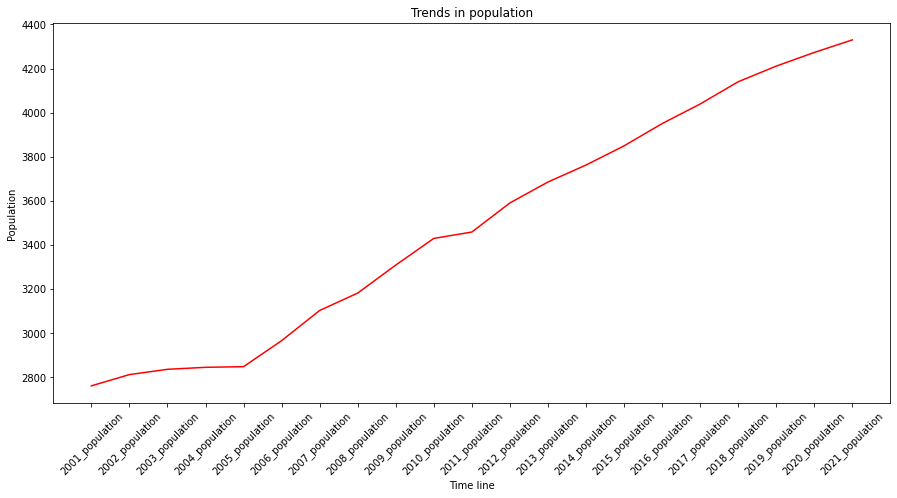

In [12]:
# plot population in one sa2 code
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.xlabel("Time line")
plt.title("Trends in population")
plt.plot(year,sa1, color = 'r')

In [13]:
# check 1st sa2code population
x = populationdata_in_each_sa2_code['Year']
y = populationdata_in_each_sa2_code['Population']
linear_model = sm.formula.ols('Population ~ Year', data = populationdata_in_each_sa2_code).fit()
print(linear_model.params)

Intercept    2541.461905
Year           86.572727
dtype: float64


In [14]:
predict_population = pd.DataFrame()
predict_year = [22,23,24,25,26,27]
predict_population['Year'] = predict_year
predict_population['Population'] = None
predict_population

,Year,Population
0,22,None
1,23,None
2,24,None
3,25,None
4,26,None
5,27,None


In [15]:
predicted_population = linear_model.predict(exog=predict_population['Year'], transform=True)
predicted_population

0    4446.061905
1    4532.634632
2    4619.207359
3    4705.780087
4    4792.352814
5    4878.925541
dtype: float64

In [16]:
predict_population['Population'] = predicted_population

In [17]:
dfs = [populationdata_in_each_sa2_code, predict_population]
five_years_population = pd.concat(dfs)

In [18]:
five_years_population.reset_index().drop(columns='index')
five_years_population['Year'] = ['2001_population', '2002_population', '2003_population',
       '2004_population', '2005_population', '2006_population',
       '2007_population', '2008_population', '2009_population',
       '2010_population', '2011_population', '2012_population',
       '2013_population', '2014_population', '2015_population',
       '2016_population', '2017_population', '2018_population',
       '2019_population', '2020_population', '2021_population',
       '2022_population', '2023_population', '2024_population',
       '2025_population', '2026_population', '2027_population']

In [19]:
five_years_population

,Population,Year
0,2760.000000,2001_population
1,2811.000000,2002_population
2,2835.000000,2003_population
3,2844.000000,2004_population
4,2847.000000,2005_population
5,2965.000000,2006_population
6,3102.000000,2007_population
7,3181.000000,2008_population
8,3308.000000,2009_population
9,3429.000000,2010_population


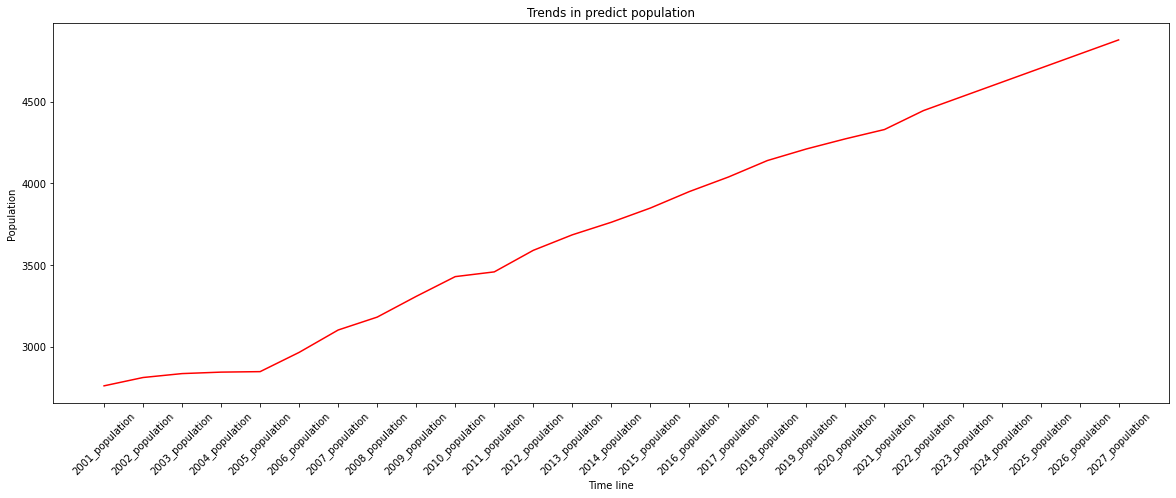

In [20]:
# plot predict population in one sa2 code
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.xlabel("Time line")
plt.title("Trends in predict population")
plt.plot(five_years_population['Year'],five_years_population['Population'], color = 'r')

In [21]:
All_sa2_code_predict_population = pd.DataFrame()
year = []
for i in population_hist_data.columns:
    temp = i.split('_')
    year.append(int(temp[0][-2:]))


predict_population_list = {}
for i in range(len(population_hist_data)):

    # create df ready to fit each row
    populationdata_in_each_sa2_code = pd.DataFrame()
    populationdata_in_each_sa2_code['Population'] = population_hist_data.iloc[i].tolist()
    populationdata_in_each_sa2_code['Year'] = year

    # create df ready to predict
    predict_population = pd.DataFrame()
    predict_year = [22,23,24,25,26,27]
    predict_population['Year'] = predict_year
    predict_population['Population'] = None
    
    # build linear model
    linear_model = sm.formula.ols('Population ~ Year', data = populationdata_in_each_sa2_code).fit()

    # predict population
    predicted_population = linear_model.predict(exog=predict_population['Year'], transform=True)
    # print(predicted_population)
    # put predicted population in df
    predict_population['Population'] = predicted_population

    # concat history population and predict population
    dfs = [populationdata_in_each_sa2_code, predict_population]
    five_years_population = pd.concat(dfs)
    five_years_population = five_years_population.reset_index().drop(columns='index')
    five_years_population['Year'] = ['2001_population', '2002_population', '2003_population',
                                    '2004_population', '2005_population', '2006_population',
                                    '2007_population', '2008_population', '2009_population',
                                    '2010_population', '2011_population', '2012_population',
                                    '2013_population', '2014_population', '2015_population',
                                    '2016_population', '2017_population', '2018_population',
                                    '2019_population', '2020_population', '2021_population',
                                    '2022_population', '2023_population', '2024_population',
                                    '2025_population', '2026_population', '2027_population']
                                    
    five_years_population['SA2_Code'] = population_hist_data.index[i]

    predict_population_list[i] = five_years_population
    # predict_population_list.append(five_years_population)

In [22]:
predict_population_list[0].transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Population,2760.0,2811.0,2835.0,2844.0,2847.0,2965.0,3102.0,3181.0,3308.0,3429.0,...,4140.0,4211.0,4273.0,4330.0,4446.061905,4532.634632,4619.207359,4705.780087,4792.352814,4878.925541
Year,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population
SA2_Code,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,...,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0


In [38]:
predict_population_df = pd.DataFrame()
predict_population_df = predict_population_list[0].transpose()
for i in range(1, len(predict_population_list)):
    # print(i)
    predict_population_df = predict_population_df.append(predict_population_list[i].transpose())
predict_population_df

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Population,2760.0,2811.0,2835.0,2844.0,2847.0,2965.0,3102.0,3181.0,3308.0,3429.0,...,4140.0,4211.0,4273.0,4330.0,4446.061905,4532.634632,4619.207359,4705.780087,4792.352814,4878.925541
Year,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population
SA2_Code,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,...,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0,101021007.0
Population,9129.0,9199.0,9263.0,9277.0,9209.0,9212.0,9033.0,8994.0,9030.0,9101.0,...,8507.0,8488.0,8519.0,8546.0,8411.833333,8367.670996,8323.508658,8279.34632,8235.183983,8191.021645
Year,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population
SA2_Code,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,...,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0,901031003.0
Population,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1920.0,1999.0,2096.0,2220.0,1851.995238,1969.193939,2086.392641,2203.591342,2320.790043,2437.988745
Year,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population


In [55]:
year_list = predict_population_df.loc['Year'].iloc[0].tolist()

In [56]:
population_data['SA2_Code']

0       101021007.0
1       101021008.0
2       101021009.0
3       101021010.0
4       101021012.0
           ...     
2449    801111141.0
2450    901011001.0
2451    901021002.0
2452    901031003.0
2453    901041004.0
Name: SA2_Code, Length: 2454, dtype: float64

In [59]:
final_predict_population_df = pd.DataFrame()

final_predict_population_df = predict_population_df.loc['Population']
final_predict_population_df.index = population_data['SA2_Code']
final_predict_population_df.columns = year_list
final_predict_population_df

,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,...,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population,2025_population,2026_population,2027_population
SA2_Code,,,,,,,,,,,,,,,,,,,,,
101021007.0,2760.0,2811.0,2835.0,2844.0,2847.0,2965.0,3102.0,3181.0,3308.0,3429.0,...,4140.0,4211.0,4273.0,4330.0,4446.061905,4532.634632,4619.207359,4705.780087,4792.352814,4878.925541
101021008.0,9129.0,9199.0,9263.0,9277.0,9209.0,9212.0,9033.0,8994.0,9030.0,9101.0,...,8507.0,8488.0,8519.0,8546.0,8411.833333,8367.670996,8323.508658,8279.34632,8235.183983,8191.021645
101021009.0,9717.0,9513.0,9522.0,9400.0,9595.0,9682.0,9793.0,10074.0,10288.0,10584.0,...,11447.0,11450.0,11437.0,11370.0,11873.009524,11993.482251,12113.954978,12234.427706,12354.900433,12475.37316
101021010.0,3925.0,4073.0,4219.0,4218.0,4187.0,4319.0,4459.0,4595.0,4712.0,4813.0,...,5072.0,5117.0,5077.0,5093.0,5355.661905,5415.289177,5474.91645,5534.543723,5594.170996,5653.798268
101021012.0,9425.0,10257.0,11085.0,11549.0,12046.0,12358.0,12622.0,12798.0,12988.0,13146.0,...,13008.0,12935.0,12796.0,12743.0,13833.680952,13957.162771,14080.644589,14204.126407,14327.608225,14451.090043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801111141.0,12.0,11.0,11.0,10.0,10.0,9.0,15.0,22.0,27.0,36.0,...,50.0,56.0,61.0,67.0,63.161905,65.977489,68.793074,71.608658,74.424242,77.239827
901011001.0,1442.0,1365.0,1337.0,1355.0,1380.0,1403.0,1569.0,1745.0,1944.0,2115.0,...,1849.0,1801.0,1752.0,1716.0,2054.138095,2081.674459,2109.210823,2136.747186,2164.28355,2191.819913
901021002.0,600.0,568.0,558.0,573.0,588.0,590.0,575.0,568.0,565.0,565.0,...,571.0,599.0,605.0,602.0,574.07619,574.28658,574.49697,574.707359,574.917749,575.128139


In [61]:
final_predict_population_df.to_csv('../data/curated/predicted_population.csv')

## k best

In [ ]:
# find the best k value and score function for feature selection via LogisticRegression
pipeline = Pipeline([('kbest', SelectKBest()), ("clf", LinearRegression())])
param = {"kbest__score_func": (f_regression, chi2, mutual_info_regression),
         "kbest__k": (30,50,80,100,130)}
gs = GridSearch(pipeline, param, x_train,y_train)
gs.best_params_

In [ ]:
# find the best k value and score function for feature selection via LogisticRegression
pipeline = Pipeline([('kbest', SelectKBest()), ("clf", SVC(max_iter = 20000))])
param = {"kbest__score_func": (f_regression, chi2, mutual_info_regression),
         "kbest__k": (30,50,80,100,130)}
gs = GridSearch(pipeline, param, x_train,y_train)
gs.best_params_

In [ ]:
# find the best k value and score function for feature selection via LogisticRegression
pipeline = Pipeline([('kbest', SelectKBest()), ("clf", Lasso(alpha=1.0))])
param = {"kbest__score_func": (f_regression, chi2, mutual_info_regression),
         "kbest__k": (30,50,80,100,130)}
gs = GridSearch(pipeline, param, x_train,y_train)
gs.best_params_

In [ ]:
# find the best k value and score function for feature selection via LogisticRegression
pipeline = Pipeline([('kbest', SelectKBest()), ("clf", Ridge(alpha=1.0))])
param = {"kbest__score_func": (f_regression, chi2, mutual_info_regression),
         "kbest__k": (30,50,80,100,130)}
gs = GridSearch(pipeline, param, x_train,y_train)
gs.best_params_

In [ ]:
#Select features by chi-square with data after word vectorization

# fit data for Bow
kbest = SelectKBest(score_func = , k = ).fit(x_train, y_train)

# transform data
kbest_train_x = kbest.transform(x_train)
kbest_test_x = kbest.transform(x_test)


In [ ]:
LR = {}
print("The accuracy of LogisticRegression")
train_acc, test_acc = LR_acc(x_train, x_test, y_train, y_test)
LR["train_acc"] = train_acc
LR["test_acc"] = test_acc
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("********************************")

SVM = {}
print("The accuracy of SVM")
train_acc, test_acc = SVM_acc(x_train, x_test, y_train, y_test)
SVM["train_acc"] = train_acc
SVM["test_acc"] = test_acc
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("********************************")

LinearR = {}
print("The accuracy of LinearRegression")
train_acc, test_acc = LinearR_acc(x_train, x_test, y_train, y_test)
LinearR["train_acc"] = train_acc
LinearR["test_acc"] = test_acc
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("********************************")

ridge = {}
print("The accuracy of Ridge")
train_acc, test_acc = Ridge_acc(x_train, x_test, y_train, y_test)
ridge["train_acc"] = train_acc
ridge["test_acc"] = test_acc
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("********************************")

lasso = {}
print("The accuracy of Lasso")
train_acc, test_acc = Lasso_acc(x_train, x_test, y_train, y_test)
lasso["train_acc"] = train_acc
lasso["test_acc"] = test_acc
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("********************************")

In [ ]:
acc_dict = [LR, SVM, LinearR, ridge,lasso]
index = ["LogisticRegression", "SVM", "LinearRegression", "Ridge", "Lasso"]
data = [[0,0],[0,0],[0,0],[0,0],[0,0]]
acc_df = pd.DataFrame(data, columns=['train_acc','test_acc'], index =index)

for i in range(5):
    model_name = index[i]
    acc_df.loc[model_name] = list(acc_dict[i].values())

In [ ]:
display(acc_df.sort_values(by=['test_acc'],ascending=False))

In [ ]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))